In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
data = pd.read_csv('../data/complaints.csv')  
data.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15564\1921920860.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [10]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [9]:
data.shape

(9609797, 18)

In [11]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

In [16]:
print("Rows before:", data.shape[0])
print("With narratives:", data['Consumer complaint narrative'].notnull().sum())



Rows before: 9609797
With narratives: 2980756


In [22]:
data = data.dropna(subset=["Consumer complaint narrative"])
print("Rows after drop:", data.shape[0])

Rows after drop: 2980756


In [18]:
print("Unique products:", data['Product'].unique())

Unique products: ['Credit reporting or other personal consumer reports' 'Mortgage'
 'Credit card' 'Checking or savings account' 'Debt collection'
 'Vehicle loan or lease'
 'Payday loan, title loan, personal loan, or advance loan'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Prepaid card' 'Debt or credit management'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit reporting' 'Credit card or prepaid card'
 'Bank account or service' 'Money transfers' 'Consumer Loan'
 'Payday loan, title loan, or personal loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


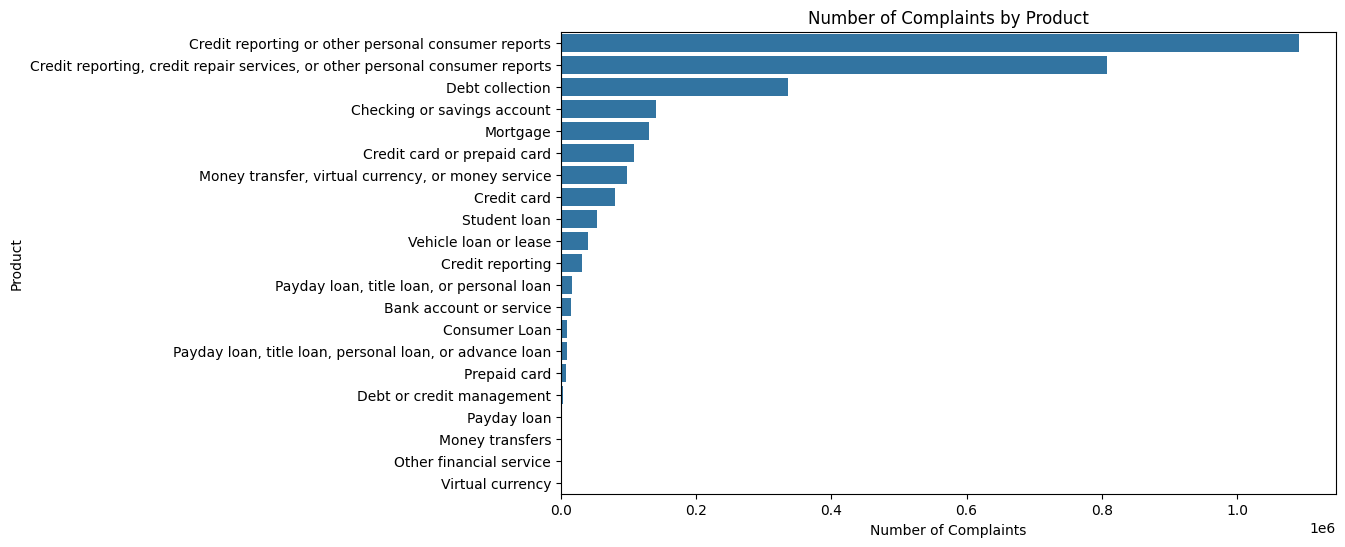

In [19]:
product_counts = data['Product'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title("Number of Complaints by Product")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()

In [23]:
# Define a mapping
product_map = {
    "Credit card": ["Credit card", "Credit card or prepaid card"],
    "Personal loan": [
        "Consumer Loan",
        "Payday loan, title loan or personal loan",
        "Payday loan, title loan, personal loan, or advance loan"
    ],
    "Buy Now, Pay Later (BNPL)": ["Consumer Loan"],  # fallback
    "Savings account": ["Checking or savings account"],
    "Money transfers": [
        "Money transfers",
        "Money transfer, virtual currency, or money service"
    ]
}

# Reverse map: flatten for filtering
flat_product_list = [item for sublist in product_map.values() for item in sublist]

# Filter dataset
data_filtered = data[data['Product'].isin(flat_product_list)]

data_filtered = data_filtered.dropna(subset=["Consumer complaint narrative"])

print("Remaining complaints:", data_filtered.shape[0])

Remaining complaints: 446695


In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)         # Remove extra spaces
    return text.strip()

data_filtered['cleaned_narrative'] = data_filtered['Consumer complaint narrative'].apply(clean_text)


In [25]:
data_filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,cleaned_narrative
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,a xxxx xxxx card was opened under my name by a...
12532,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,NaN,Consent provided,Web,2025-06-13,Closed with explanation,Yes,NaN,14061897,i made the mistake of using my wellsfargo debi...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,dear cfpb i have a secured credit card with ci...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,i have a citi rewards cards the credit balance...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,bi am writing to dispute the following charges...


In [27]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446695 entries, 12237 to 9609735
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 446695 non-null  object
 1   Product                       446695 non-null  object
 2   Sub-product                   427823 non-null  object
 3   Issue                         446695 non-null  object
 4   Sub-issue                     309548 non-null  object
 5   Consumer complaint narrative  446695 non-null  object
 6   Company public response       180151 non-null  object
 7   Company                       446695 non-null  object
 8   State                         441332 non-null  object
 9   ZIP code                      446695 non-null  object
 10  Tags                          78271 non-null   object
 11  Consumer consent provided?    446695 non-null  object
 12  Submitted via                 446695 non-null  object
 13 

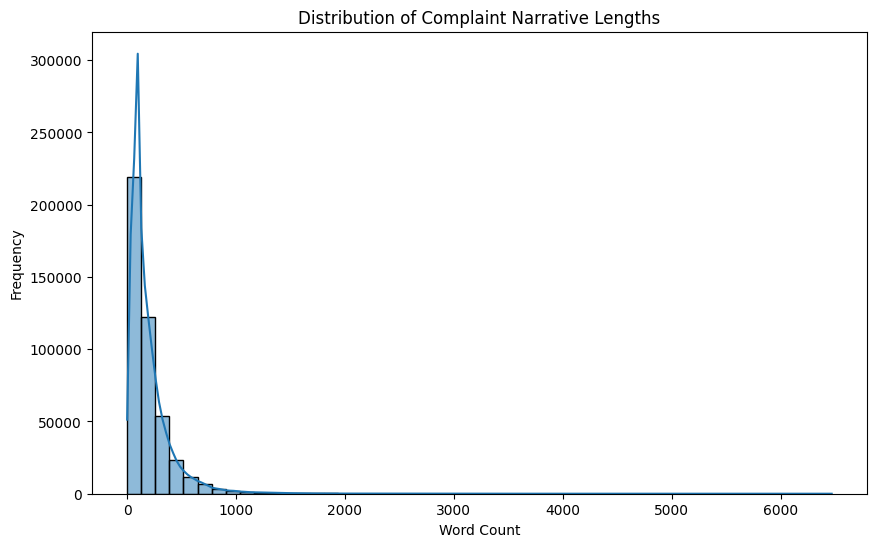

count    446695.000000
mean        201.000616
std         221.748087
min           1.000000
25%          81.000000
50%         134.000000
75%         250.000000
max        6469.000000
Name: word_count, dtype: float64

In [28]:
# Add word count
data_filtered['word_count'] = data_filtered['cleaned_narrative'].apply(lambda x: len(x.split()))

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data_filtered['word_count'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Describe lengths
data_filtered['word_count'].describe()


In [29]:
data_filtered.to_csv('../data/filtered_complaints.csv', index=False)